# Particle classification from deep inelastic electron-proton scattering

This project aims to find the bes model to classify subatomic particles that are products of a high energy collision between an electron and a proton, based on momentum, energy, mass,and other fetures obtained by a detector.

## Business understanding 
Particle identification is a fundamental task in high energy physics, where scientists study the properties and behavior of subatomic particles. Accurate particle identification is critical for a wide range of applications, including particle tracking, event reconstruction, and particle physics experiments.

One reason why AI is necessary for particle identification in high energy physics is that the datasets generated by particle detectors are typically very large and complex, with millions or billions of data points. These datasets often contain noise, background events, and multiple particle interactions, which can make it difficult for human experts to identify and classify particles accurately and efficiently.

AI techniques, such as machine learning and deep learning, are well-suited to handle large and complex datasets, and can automate the process of particle identification. For example, supervised learning algorithms can be trained on large datasets of labeled particles to learn the characteristics and properties of different particle types. Once trained, these algorithms can accurately and quickly classify new particles based on their features and properties.

Another advantage of using AI for particle identification is that it can help scientists discover new particles and phenomena that may be difficult to detect using traditional methods. For example, deep learning algorithms can be used to analyze patterns and anomalies in large datasets, and identify unusual or unexpected events that may indicate the presence of new particles or interactions.

Overall, AI is necessary for particle identification in high energy physics because it enables scientists to process and analyze large and complex datasets, automate the process of particle identification, and discover new particles and phenomena that may be difficult to detect using traditional methods.

### Traditional methods
There are several traditional methods that have been used for particle identification in high energy physics, including:
- **Ionization measurements**: This method relies on measuring the amount of ionization produced by a particle as it passes through a detector. Different particles produce different amounts of ionization, which can be used to identify and differentiate them.

- **Time-of-flight measurements**: This method relies on measuring the time it takes for a particle to travel a certain distance through a detector. Different particles have different speeds and masses, which can cause them to arrive at the detector at different times. By measuring the time-of-flight, particles can be identified and differentiated.

- **Cherenkov radiation**: This method relies on detecting the Cherenkov radiation produced by a charged particle as it passes through a medium at a speed greater than the speed of light in that medium. Different particles produce different types of Cherenkov radiation, which can be used to identify and differentiate them.

- **Magnetic field measurements**: This method relies on measuring the curvature of a particle's path as it passes through a magnetic field. Different particles with different charges and masses will be deflected by the magnetic field in different ways, which can be used to identify and differentiate them.

While these traditional methods have been successful in identifying and classifying particles, they have limitations when it comes to handling large and complex datasets, dealing with noise and background events, and identifying new particles and phenomena that may not fit into known categories. This is where AI techniques can provide significant advantages over traditional methods, as they are better suited to handle these challenges and can provide more accurate and efficient particle identification.

## Data extraction 
First we need to download the dataset we will be using, from this link:
https://www.kaggle.com/datasets/naharrison/particle-identification-from-detector-responses

It is a dataset generatied by a simulation software called GEANT from the CERN laboratories. Mor information about the simulated detectors is found here> https://www.ge.infn.it/geant4/training/ptb_2009/detector_response.pdf


Other sources:
-     **HEPData**: This is a large collection of particle physics datasets, including datasets for particle identification. The datasets are curated by the HEPData project and are available for download in a variety of formats. 
    - HEPData: https://www.hepdata.net/
- **LHC Olympics 2020**: This is a competition organized by the ATLAS and CMS experiments at CERN, which provides a set of simulated particle physics data for participants to analyze and classify. The data is labeled with information about the type of particles and their properties.
    - LHC Olympics 2020: https://www.kaggle.com/c/lhcolympics2020/data
- **MINERvA experiment**: This is a dataset of neutrino interactions collected by the MINERvA experiment at Fermilab. The dataset includes labeled data for particle identification and has been used in several studies and competitions.
    - MINERvA experiment: https://minerva-docdb.fnal.gov/cgi-bin/private/ShowDocument?docid=14194
- **Kaggle particle identification challenge**: This is a competition organized by Kaggle, which provides a dataset of simulated particle physics events for participants to classify. The dataset is labeled with information about the type of particles and their properties.
   - Kaggle particle identification challenge: https://www.kaggle.com/c/flavours-of-physics/data

Data files Files will be saved in the same place as this notebook inside the folder **Collision Dataset** with the name *collision_simulations.csv* (renamed the file from *pid-M5.csv*)

In [1]:
# import the required libraries 
import numpy as np 
import pandas as pd

In [2]:
Collisions_df = pd.read_csv("./Collision Dataset/collision_simulations.csv") 

In [3]:
Collisions_df.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


### About the features:
- **id**: Identification of the particle event, i.e., what is the product particle after the collision. This is our target variable. 
- **p**: Momentum of the particle when it reaches the detector (GeV/c)  
- **theta**: azimutal angle (radians)
- **beta**: polar angle (radians)
- **nphe**: number of photo electrons produced in the photomultipler
- **ein**: energy in 
- **eout**: energy out 

Produced particles 
- positron: $e$ + $p$ $\longrightarrow$ $e^+$ + ?
- pion: e + p $\longrightarrow$ $\pi^+$ + $n$ 
- kaon: 

In [4]:
Collisions_df['id'].count()

5000000

In [5]:
#Collisions_df.id = Collisions_df.id.map({-11: 'positron', 211: 'pion', 321: 'kaon', 2212: 'proton'})
Collisions_df.id = Collisions_df.id.map({-11: '0', 211: '1', 321: '2', 2212: '3'})
Collisions_df.groupby("id")['id'].count()

id
0      14847
1    2806833
2     232471
3    1945849
Name: id, dtype: int64

## Data cleaning and exploration

In [6]:
import numpy as np
import scipy.optimize as opt
import re, seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
#from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


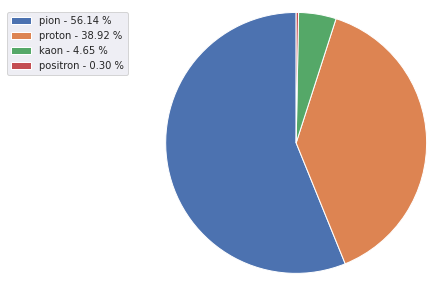

In [68]:
plt.figure(figsize=(5, 5))
x = np.char.array(['pion','proton','kaon','positron'])
y = np.array([2806833, 1945849, 232471, 14847]) 
percent = 100.*y/y.sum()
patches, texts = plt.pie(y, startangle=90, radius=1.2) #colors=colors
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                           key=lambda x: x[2],
                                           reverse=True))
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
            fontsize=10)

plt.savefig('piechart.png', bbox_inches='tight')

<AxesSubplot:>

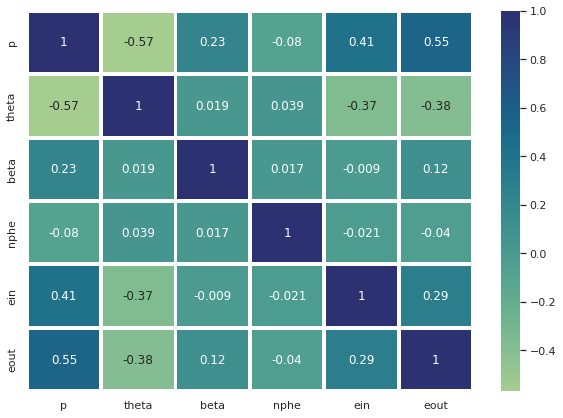

In [67]:
fig, ax = plt.subplots(figsize=(10,7))  
sns.set(font_scale=1)
sns.heatmap(Collisions_df.corr() , annot= True, linewidths=3, ax=ax, cmap="crest")


### Imbalanced dataset
The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

In [12]:
# Dealing with an Imbalanced dataset (implementing SMOTE)
# For this model, we will first reduce the dataset so that pions protons and kaons have the same number of rows.
df_pion = Collisions_df.loc[Collisions_df["id"] == '1'].sample(n = 14847*2)
df_proton = Collisions_df.loc[Collisions_df["id"] == '2'].sample(n = 14847*2)
df_kaon = Collisions_df.loc[Collisions_df["id"] == '3'].sample(n = 14847*2)
df_positron = Collisions_df.loc[Collisions_df["id"] == '0']
#
Collisions_df_2 = pd.concat([df_pion,df_proton,df_kaon,df_positron])
Collisions_df_2 = Collisions_df_2.sample(frac=1)

In [13]:
Collisions_df_2

,id,p,theta,beta,nphe,ein,eout
4823783,3,0.670329,0.276731,0.581061,0,0.071870,0.000000
4026827,0,1.976350,0.232630,1.003770,56,0.361273,0.138109
4903172,3,0.818036,0.490654,0.667967,0,0.066377,0.000000
2810108,2,2.608070,0.228334,0.983500,0,0.049119,0.049531
767161,1,0.798047,0.348762,0.996074,0,0.023438,0.037079
...,...,...,...,...,...,...,...
4297859,1,2.192720,0.343218,0.987821,0,0.031266,0.055482
1468082,2,1.791870,0.265538,0.968877,0,0.042252,0.000000
4650727,3,0.989853,0.394442,0.728523,0,0.054841,0.093568
3124487,2,3.072400,0.282519,0.970690,0,0.028611,0.043625


In [14]:
Collisions_df_2.groupby("id")['id'].count()

id
0    14847
1    29694
2    29694
3    29694
Name: id, dtype: int64

## Features and Target 

In [15]:
from tensorflow.keras.utils import to_categorical

X = Collisions_df_2.drop(['id'], axis=1) 
y = Collisions_df_2['id'] 
y = to_categorical(y)

## We will implement a SMOTE algorithm
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)


/home/jigalindo0104/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1 2 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [28]:
def d(x):
    dd = {0: 'positron', 1: 'pion', 2: 'kaon', 3: 'proton'}
    return dd[x]

y_df= pd.Series(np.array(list(map(d,np.argmax(y, axis=1)))))

DF =X.reset_index().drop('index',axis=1).copy()

DF["particle"] = y_df.reset_index().drop('index',axis=1)

In [29]:
#X.reset_index().drop('index',axis=1)
DF

,p,theta,beta,nphe,ein,eout,particle
0,0.670329,0.276731,0.581061,0,0.071870,0.000000,proton
1,1.976350,0.232630,1.003770,56,0.361273,0.138109,positron
2,0.818036,0.490654,0.667967,0,0.066377,0.000000,proton
3,2.608070,0.228334,0.983500,0,0.049119,0.049531,kaon
4,0.798047,0.348762,0.996074,0,0.023438,0.037079,pion
...,...,...,...,...,...,...,...
118279,0.291986,0.209984,0.996529,0,0.000000,0.000000,positron
118280,0.307902,0.291868,0.975142,0,0.000000,0.000000,positron
118281,0.246735,0.284041,0.989108,0,0.000000,0.000000,positron
118282,0.363417,0.808700,0.993677,0,0.000000,0.000000,positron


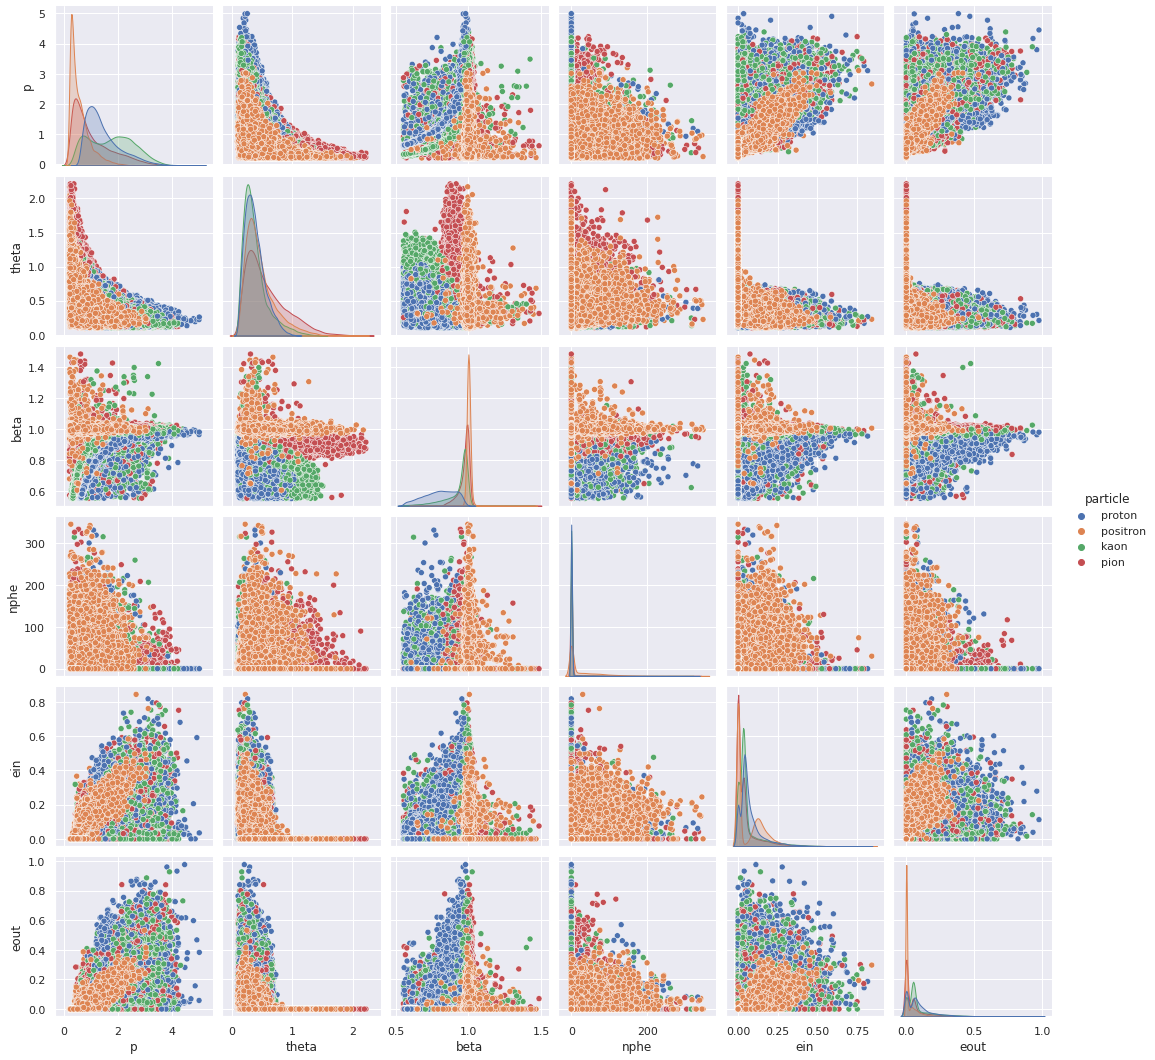

In [30]:
sns.pairplot(DF, hue="particle")

In [15]:
for a in y:
    print(a)

[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0.

[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0.

[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0.

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1.

[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0.

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0.

[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0.

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0.

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1.

[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0.

[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0.

[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0.

[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1.

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0.

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0.

[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0.

[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1.

[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0.

[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1.

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0.

[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1.

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1.

[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0.

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1.

[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0.

[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0.

[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0.

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1.

[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0.

[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0.

[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0.

[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1.

[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1.

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0.

[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0.

[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0.

[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1.

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1.

[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0.

[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0.

[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0.

[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0.

[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1.

[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0.

[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0.

[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0.

[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0.

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0.

[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0.

[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1.

[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0.

[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0.

[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0.

[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1.

[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1.

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0.

[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1.

[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0.

[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0.

[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0.

[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0.

[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0.

[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0.

[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1.

[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0.

[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0.

[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 1. 0. 0.]


In [31]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.20)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Neural Network

In [34]:
from keras.models import Sequential
from keras.layers import Dense

# Define your neural network architecture
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))

# Compile your model with a loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model on your training data
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate your model on your testing data
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
2958/2958 [==============================] - 2s 635us/step - loss: 0.4158 - accuracy: 0.6361
Epoch 2/100
2958/2958 [==============================] - 2s 632us/step - loss: 0.1702 - accuracy: 0.9195
Epoch 3/100
2958/2958 [==============================] - 2s 640us/step - loss: 0.1133 - accuracy: 0.9338
Epoch 4/100
2958/2958 [==============================] - 2s 654us/step - loss: 0.1008 - accuracy: 0.9363
Epoch 5/100
2958/2958 [==============================] - 2s 595us/step - loss: 0.0956 - accuracy: 0.9373
Epoch 6/100
2958/2958 [==============================] - 2s 603us/step - loss: 0.0930 - accuracy: 0.9379
Epoch 7/100
2958/2958 [==============================] - 2s 626us/step - loss: 0.0916 - accuracy: 0.9385
Epoch 8/100
2958/2958 [==============================] - 2s 610us/step - loss: 0.0907 - accuracy: 0.9387
Epoch 9/100
2958/2958 [==============================] - 2s 597us/step - loss: 0.0902 - accuracy: 0.9394
Epoch 10/100
2958/2958 [==============================]

2958/2958 [==============================] - 2s 596us/step - loss: 0.0850 - accuracy: 0.9432
Epoch 79/100
2958/2958 [==============================] - 2s 591us/step - loss: 0.0850 - accuracy: 0.9430
Epoch 80/100
2958/2958 [==============================] - 2s 594us/step - loss: 0.0850 - accuracy: 0.9432
Epoch 81/100
2958/2958 [==============================] - 2s 601us/step - loss: 0.0850 - accuracy: 0.9434
Epoch 82/100
2958/2958 [==============================] - 2s 597us/step - loss: 0.0849 - accuracy: 0.9436
Epoch 83/100
2958/2958 [==============================] - 2s 605us/step - loss: 0.0849 - accuracy: 0.9431
Epoch 84/100
2958/2958 [==============================] - 2s 595us/step - loss: 0.0850 - accuracy: 0.9429
Epoch 85/100
2958/2958 [==============================] - 2s 600us/step - loss: 0.0849 - accuracy: 0.9433
Epoch 86/100
2958/2958 [==============================] - 2s 588us/step - loss: 0.0848 - accuracy: 0.9433
Epoch 87/100
2958/2958 [==============================] - 2

In [35]:
#y_test

In [36]:
#y

In [37]:
from sklearn.metrics import confusion_matrix

y_prediction = model.predict(X_test)
y_prediction = np.array(list(map(d,np.argmax (y_prediction, axis = 1))))
print(y_prediction)
y_test_copy = y_test.copy()
y_test_copy= np.array(list(map(d,np.argmax(y_test_copy, axis=1))))
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test_copy, y_prediction )#, normalize='pred')
print(result)

['positron' 'kaon' 'kaon' ... 'pion' 'pion' 'proton']
[[5620  193   14  138]
 [ 408 5249  233   49]
 [  12  195 5679    1]
 [ 102    0    0 5764]]


In [38]:
count = {"proton":0,"kaon":0,"positron":0,"pion":0}
for a in list(y_prediction):
    count[a]+= 1
count    

{'proton': 5952, 'kaon': 6142, 'positron': 5926, 'pion': 5637}

In [39]:
count = {"proton":0,"kaon":0,"positron":0,"pion":0}
for a in list(y_test_copy):
    count[a]+= 1
count

{'proton': 5866, 'kaon': 5965, 'positron': 5887, 'pion': 5939}

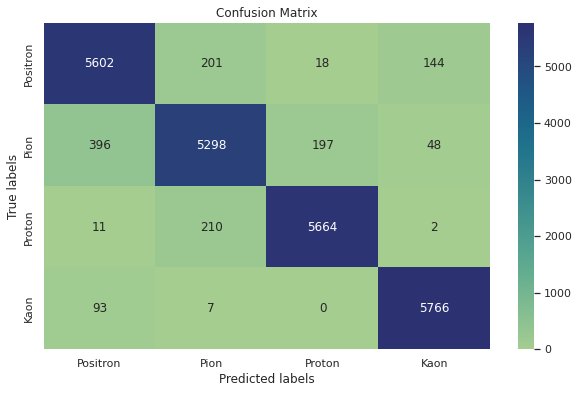

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt     

fig,ax= plt.subplots(figsize=(10, 6))
sns.heatmap(result, annot=True, fmt='g', ax=ax ,cmap="crest");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positron','Pion', 'Proton','Kaon']); ax.yaxis.set_ticklabels(['Positron','Pion', 'Proton','Kaon']);

In [41]:
y_prediction

array(['positron', 'kaon', 'kaon', ..., 'pion', 'pion', 'proton'],
      dtype='<U8')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test_copy, y_prediction, target_names=['positron','pion','proton','kaon']))

              precision    recall  f1-score   support

    positron       0.92      0.94      0.93      5965
        pion       0.93      0.88      0.91      5939
      proton       0.96      0.96      0.96      5887
        kaon       0.97      0.98      0.98      5866

    accuracy                           0.94     23657
   macro avg       0.94      0.94      0.94     23657
weighted avg       0.94      0.94      0.94     23657



In [43]:
from keras.models import Sequential
from keras.layers import Dense

# Define your neural network architecture
model2 = Sequential()
model2.add(Dense(10, input_dim=6, activation='relu'))
model2.add(Dense(4, activation='sigmoid'))

# Compile your model with a loss function and optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model on your training data
model2.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate your model on your testing data
loss, accuracy = model2.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
2958/2958 [==============================] - 2s 522us/step - loss: 0.6158 - accuracy: 0.7794
Epoch 2/100
2958/2958 [==============================] - 1s 492us/step - loss: 0.3351 - accuracy: 0.9129
Epoch 3/100
2958/2958 [==============================] - 1s 502us/step - loss: 0.2884 - accuracy: 0.9298
Epoch 4/100
2958/2958 [==============================] - 1s 497us/step - loss: 0.2701 - accuracy: 0.9356
Epoch 5/100
2958/2958 [==============================] - 2s 508us/step - loss: 0.2597 - accuracy: 0.9378
Epoch 6/100
2958/2958 [==============================] - 1s 497us/step - loss: 0.2520 - accuracy: 0.9387
Epoch 7/100
2958/2958 [==============================] - 1s 495us/step - loss: 0.2453 - accuracy: 0.9397
Epoch 8/100
2958/2958 [==============================] - 1s 489us/step - loss: 0.2389 - accuracy: 0.9403
Epoch 9/100
2958/2958 [==============================] - 1s 488us/step - loss: 0.2339 - accuracy: 0.9407
Epoch 10/100
2958/2958 [==============================]

2958/2958 [==============================] - 2s 541us/step - loss: 0.1777 - accuracy: 0.9433
Epoch 77/100
2958/2958 [==============================] - 2s 522us/step - loss: 0.1778 - accuracy: 0.9435
Epoch 78/100
2958/2958 [==============================] - 2s 508us/step - loss: 0.1773 - accuracy: 0.9435
Epoch 79/100
2958/2958 [==============================] - 2s 517us/step - loss: 0.1778 - accuracy: 0.9433
Epoch 80/100
2958/2958 [==============================] - 2s 536us/step - loss: 0.1772 - accuracy: 0.9434
Epoch 81/100
2958/2958 [==============================] - 1s 503us/step - loss: 0.1773 - accuracy: 0.9432
Epoch 82/100
2958/2958 [==============================] - 2s 518us/step - loss: 0.1772 - accuracy: 0.9432
Epoch 83/100
2958/2958 [==============================] - 2s 518us/step - loss: 0.1771 - accuracy: 0.9432
Epoch 84/100
2958/2958 [==============================] - 2s 509us/step - loss: 0.1772 - accuracy: 0.9434
Epoch 85/100
2958/2958 [==============================] - 2

In [63]:
from sklearn.metrics import classification_report
y_prediction2 = model2.predict(X_test)
def dnum(x):
    dd = {0: [1.0,0.0,0.0,0.0], 1: [0.0,1.0,0.0,0.0], 2:[0.0,0.0,1.0,0.0], 3:[0.0,0.0,0.0,1.0]}
    return dd[x]

y_prediction2 = np.array(list(map(dnum,np.argmax (y_prediction2, axis = 1))))
print(classification_report(y_test, y_prediction2, target_names=['positron','pion','proton','kaon']))

              precision    recall  f1-score   support

    positron       0.96      0.96      0.96      5887
        pion       0.93      0.89      0.91      5939
      proton       0.92      0.94      0.93      5965
        kaon       0.97      0.98      0.98      5866

   micro avg       0.94      0.94      0.94     23657
   macro avg       0.94      0.94      0.94     23657
weighted avg       0.94      0.94      0.94     23657
 samples avg       0.94      0.94      0.94     23657



[[5602  201   18  144]
 [ 396 5298  197   48]
 [  11  210 5664    2]
 [  93    7    0 5766]]


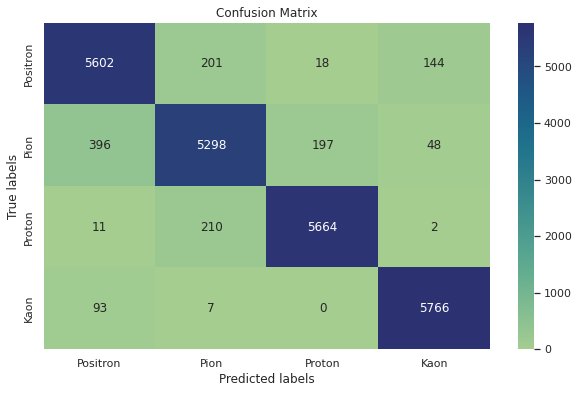

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt     
#y_test_copy = y_test.copy()
#y_test_copy= np.array(list(map(d,np.argmax(y_test_copy, axis=1))))
y_prediction2 = np.array(list(map(d,np.argmax (y_prediction2, axis = 1))))
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test_copy, y_prediction2 )#, normalize='pred')
print(result)
fig,ax= plt.subplots(figsize=(10, 6))
sns.heatmap(result, annot=True, fmt='g', ax=ax,cmap="crest");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positron','Pion', 'Proton','Kaon']); ax.yaxis.set_ticklabels(['Positron','Pion', 'Proton','Kaon']);